## Installs and Imports

In [3]:
%pip install mpmath

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ------------------------------------ 536.2/536.2 kB 152.3 kB/s eta 0:00:00
     ---------------------------------------- 6.2/6.2 MB 1.8 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
%pip install sympy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [94]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from copy import deepcopy

In [8]:
np.random.seed(42)  # For reproducibility

## A - Function, Gradient, Hessian, and Inverse of Hessian

In [9]:
x1, x2 = sp.symbols('x1 x2')

f = 100 * (x2 - x1**2)**2 + (1 - x1)**2

In [37]:
gradient = [sp.diff(f, var) for var in (x1, x2)]
hessian = sp.Matrix([[sp.diff(g, var) for var in (x1, x2)] for g in gradient])
hessian_inv = hessian.inv()

In [38]:
print("Gradient:")
print(gradient)

print("\nHessian:")
print(hessian)

print("\nInverse of the Hessian:")
print(hessian_inv)

Gradient:
[-400*x1*(-x1**2 + x2) + 2*x1 - 2, -200*x1**2 + 200*x2]

Hessian:
Matrix([[1200*x1**2 - 400*x2 + 2, -400*x1], [-400*x1, 200]])

Inverse of the Hessian:
Matrix([[1/(400*x1**2 - 400*x2 + 2), x1/(200*x1**2 - 200*x2 + 1)], [x1/(200*x1**2 - 200*x2 + 1), (600*x1**2 - 200*x2 + 1)/(40000*x1**2 - 40000*x2 + 200)]])


## B - Applying Steepest-Descent and Newton Methods

In [39]:
# Convert symbolic to numerical functions
f_func = sp.lambdify((x1, x2), f, 'numpy')
grad_func = sp.lambdify((x1, x2), gradient, 'numpy')
hess_func = sp.lambdify((x1, x2), hessian, 'numpy')
hess_inv_func = sp.lambdify((x1, x2), hessian_inv, 'numpy')

In [132]:
x0 = [-4, 10]
optimum_point = np.array([1, 1], dtype=float)
optimum_value = f_func(1, 1)

In [176]:
def line_search(f_func, x, direction, grad, alpha0=0.2, rho=0.8, c=1e-4):
    alpha = alpha0
    while f_func(*(x + alpha * direction)) > f_func(*x) + c * alpha * np.dot(grad, direction):
        alpha *= rho
    return alpha

def steepest_descent_with_line_search(f_func, grad_func, x0, tol=1e-6, max_iter=200):
    x = np.array(x0, dtype=float)
    history = [deepcopy(x)]
    f_history = [f_func(*x)]
    f_delta_history = [np.linalg.norm(x - optimum_point)]
    
    for _ in range(max_iter):
        grad = np.array(grad_func(*x), dtype=float)
        
        if np.linalg.norm(grad) < tol:
            break
        
        direction = -grad
        alpha = line_search(f_func, x, direction, grad)
        x += alpha * direction
        
        history.append(deepcopy(x))
        f_history.append(f_func(*x))
        f_delta_history.append(np.linalg.norm(x - optimum_point))
        
    return np.array(history), np.array(f_history), np.array(f_delta_history)

In [172]:
def newton_method(f_func, grad_func, hess_inv_func, x0, tol=1e-6, alpha=0.2, max_iter=100):
    x = np.array(x0, dtype=float)
    history = [deepcopy(x)]
    f_history = [f_func(*x)]
    f_delta_history = [np.linalg.norm(x - optimum_point)]

    for _ in range(max_iter):
        grad = np.array(grad_func(*x), dtype=float)
        hess_inv = np.array(hess_inv_func(*x), dtype=float)
        
        if np.linalg.norm(grad) < tol:
            break
        
        x -= alpha * hess_inv @ grad
        
        history.append(deepcopy(x))
        f_history.append(f_func(*x))
        f_delta_history.append(np.linalg.norm(x - optimum_point))
        
    return np.array(history), np.array(f_history), np.array(f_delta_history)

In [177]:
sd_history, sd_f_history, sd_f_delta_history = steepest_descent_with_line_search(f_func, grad_func, x0)

In [173]:
nm_history, nm_f_history, nm_f_delta_history = newton_method(f_func, grad_func, hess_inv_func, x0)

## C, D - Analysis of the Results

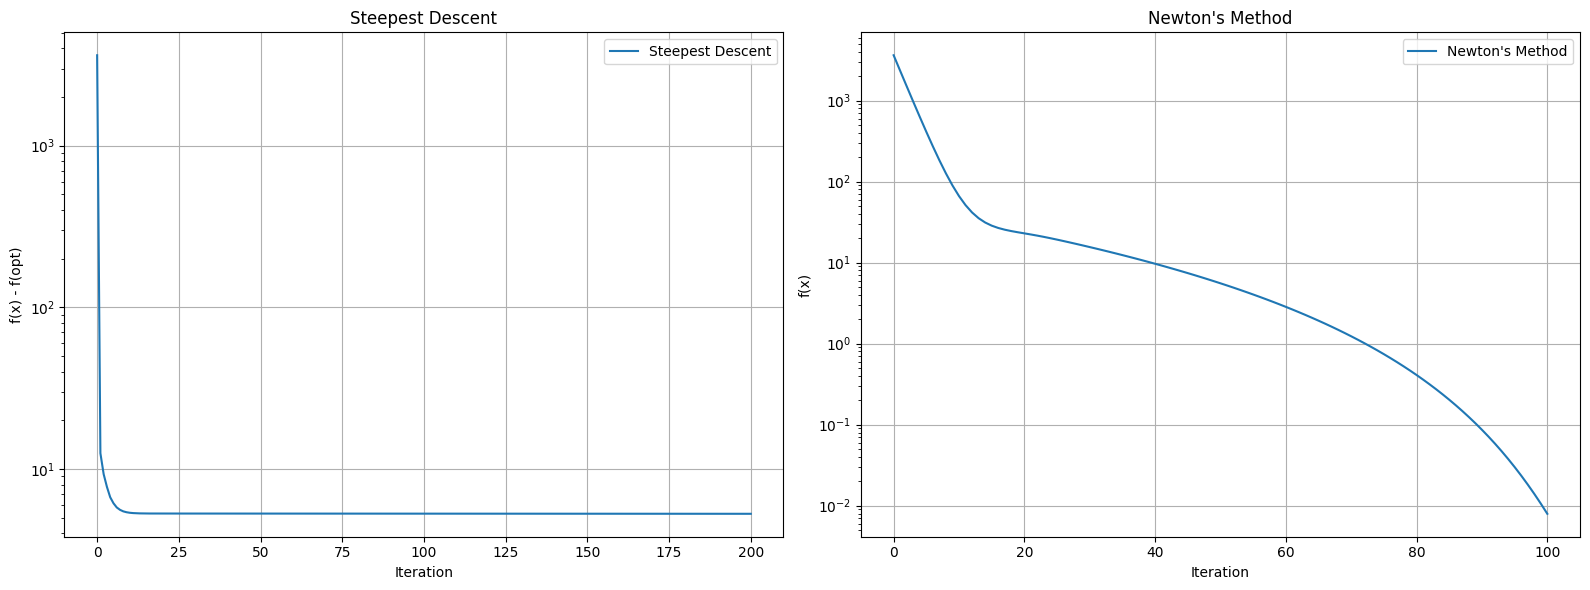

In [178]:
# Plot function value differences
plt.figure(figsize=(16, 6))

# Steepest Descent plot
plt.subplot(1, 2, 1)
plt.plot(range(len(sd_f_history)), sd_f_history, label='Steepest Descent')
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('f(x) - f(opt)')
plt.title('Steepest Descent')
plt.legend()
plt.grid(True)

# Newton's Method plot
plt.subplot(1, 2, 2)
plt.plot(range(len(nm_f_history)), nm_f_history, label="Newton's Method")
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('f(x)')
plt.title('Newton\'s Method')
plt.legend()
plt.grid(True)

# Adjust layout and show
plt.tight_layout()
plt.show()

Newton:
- Fast convergence.

Steepest-Descent:
- Slow convergence near the optimum.

### Advantages of Each Method

**Steepest Descent (Gradient Descent):**
- **Simplicity:** Easy to implement and understand.
- **Global Convergence:** Can be used to find the global minimum, given a proper learning rate and convex function.
- **Scalability:** Works well with large datasets and high-dimensional spaces.

**Newton's Method:**
- **Fast Convergence:** Quadratic convergence near the optimum, making it very fast when close to the solution.
- **Precision:** Uses second-order information (Hessian matrix) to make more informed steps.

### Combining Both Methods

1. **Hybrid Approach:**
   - **Start with Gradient Descent:** Use Gradient Descent in the initial stages of optimization. This helps in navigating the broader landscape of the function and avoids the computational cost of calculating the Hessian matrix.
   - **Switch to Newton's Method:** Once the algorithm is close to the optimum (determined by a threshold on the gradient norm), switch to Newton's Method for faster convergence.

2. **Modified Newton's Method:**
   - **Damped Newton's Method:** Incorporate a damping factor to Newton's step to avoid large, unstable steps. This combines the stability of Gradient Descent with the speed of Newton's Method.
   - **Quasi-Newton Methods:** Use approximations of the Hessian matrix (like BFGS or L-BFGS) to reduce computational complexity while retaining the benefits of second-order methods.

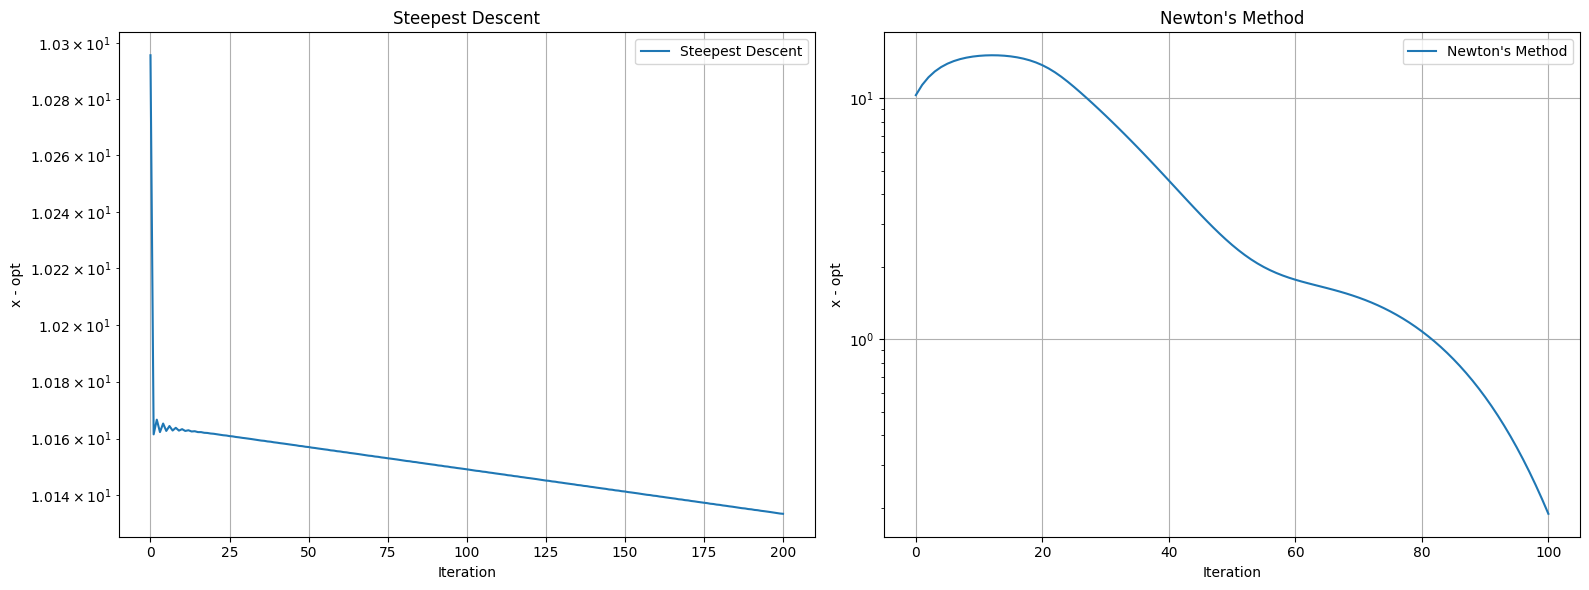

In [179]:
# Plot function value differences
plt.figure(figsize=(16, 6))

# Steepest Descent plot
plt.subplot(1, 2, 1)
plt.plot(range(len(sd_f_history)), sd_f_delta_history, label='Steepest Descent')
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('x - opt')
plt.title('Steepest Descent')
plt.legend()
plt.grid(True)

# Newton's Method plot
plt.subplot(1, 2, 2)
plt.plot(range(len(nm_f_history)), nm_f_delta_history, label="Newton's Method")
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('x - opt')
plt.title('Newton\'s Method')
plt.legend()
plt.grid(True)

# Adjust layout and show
plt.tight_layout()
plt.show()

Same conclusion.